In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

In [2]:
#Read in data
header = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing_data = pd.read_table('data/housing.tsv', sep='\s+');
housing_data.columns = header
housing_data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
500,0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21,391.99,9.67,22.4
501,0.04527,0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21,396.90,9.08,20.6
502,0.06076,0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21,396.90,5.64,23.9
503,0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21,393.45,6.48,22.0
504,0.04741,0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21,396.90,7.88,11.9


In [3]:
#Preprocessing - Normalization
X = housing_data[header[:-1]]
y = housing_data.MEDV
means = X.mean()
stds = X.std()
X = X.apply(lambda x: (x-x.mean())/x.std())
#print X.mean(), X.std() #Check mean ~ 0, std ~ 1

In [4]:
#Add bias variable
X['bias'] = np.ones_like(y)

#Split into training and test sets
test_mask = np.random.rand(len(housing_data)) < 0.8
train_X = X[test_mask]
test_X = X[~test_mask]

train_y = y[test_mask]
test_y = y[~test_mask]

In [5]:
def mse(X, y):
    alpha = 0.01
    theta = np.zeros_like(X.iloc[0])
    J = []
    thetas = []
    
    for i in xrange(300):
        J.append(np.sum((y - X.dot(theta)).apply(np.square))/2)
        theta = theta + alpha / len(y) * (y - X.dot(theta)).dot(X)
        thetas.append(theta)
    
    #Plot J
    #plt.figure()
    #plt.plot(J)
    #plt.xlabel('Iterations')
    #plt.ylabel('Loss Function (J)')
    
    #Plot Convergence 
    #plt.figure()
    #for name in X.columns[1:]:
    #    y_ = [series_[name] for series_ in thetas]
    #    plt.plot(y_, label=name)
    #plt.legend()
    
    return theta
    
theta = mse(train_X, train_y)
print theta

CRIM       -0.581596
ZN          0.515589
INDUS      -0.581475
CHAS        0.848850
NOX        -0.629074
RM          3.393814
AGE         0.001878
DIS        -1.799662
RAD         0.426456
TAX        -0.632550
PTRATIO    -1.854125
B           0.509744
LSTAT      -3.366843
bias       21.303111
dtype: float64


In [6]:
#Test out regression
compare = pd.DataFrame({'Train': test_X.dot(theta), 'Actual': test_y})
compare['Difference'] = compare.Train - compare.Actual
compare['MSE'] = (compare.Train - compare.Actual)**2
compare

,Actual,Train,Difference,MSE
0,21.6,24.245353,2.645353,6.997891
1,34.7,30.318359,-4.381641,19.198781
3,36.2,28.433089,-7.766911,60.324900
7,16.5,11.635992,-4.864008,23.658574
9,15.0,19.512325,4.512325,20.361080
14,19.9,18.724612,-1.175388,1.381536
23,15.6,15.538279,-0.061721,0.003810
29,12.7,11.475127,-1.224873,1.500313
39,34.9,31.960645,-2.939355,8.639806
41,25.3,23.992218,-1.307782,1.710293


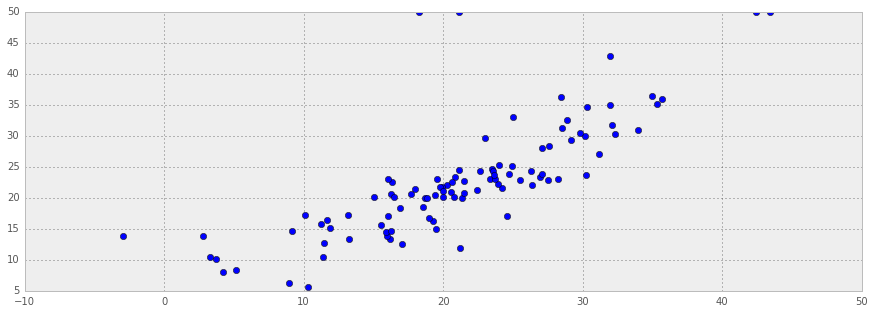

In [7]:
#Plot
theta = mse(train_X, train_y)
pred = test_X.dot(theta)
plt.plot(pred, test_y, 'bo')

In [8]:
print 'Average mean square error:', compare['MSE'].mean() 
print 'Average distance from actual value:', np.sqrt(compare['MSE'].mean())

Average mean square error: 36.5257833578
Average distance from actual value: 6.04365645597


/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


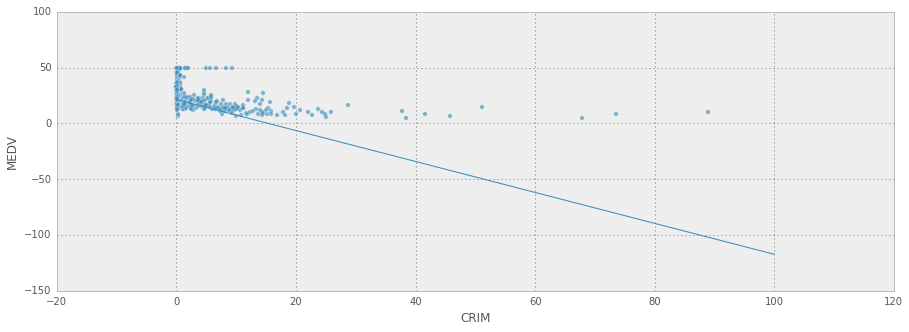

In [9]:
#Quick Visualization of graphs
x_display = housing_data['CRIM']
y_display = housing_data['MEDV']
disp = pd.DataFrame({'CRIM':x_display,'MEDV':y_display})

lin_x = np.linspace(0, 100, 1000)
lin_y = (theta[0]*stds.CRIM + means.CRIM) * lin_x + theta[-1]

plt.figure()
disp.plot(kind='scatter', x='CRIM', y='MEDV', alpha=0.6)
plt.plot(lin_x, lin_y)

In [10]:
from numpy import linalg

#Verify values through matrix multiplication
#Swap order of matrix
reordered = train_X.columns.values[-1:].tolist() + train_X.columns.values[:-1].tolist()
train_X = train_X[reordered] 
X_mat = train_X.as_matrix()

matrix_vars = pd.Series(linalg.pinv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(train_y), index=reordered)

In [11]:
theta_csv = pd.DataFrame({'matrix':matrix_vars, 'gradient descent':theta})

In [12]:
def confidence_interval(X, y, b):
    #b is theta garnered from linear algebra
    res = y - X.dot(b)
    var_res = np.sum(res**2)/(X.shape[0]-X.shape[1])
    ci = {}
    
    from scipy.stats import t
    #2-sided t-test at alpha=0.05
    t_stat = t.ppf((1-0.05/2), X.shape[1])
    ci['bias'] = t_stat * np.sqrt(var_res / (X.shape[0]-X.shape[1]))
    
    #CI for vars
    for name in X.columns[1:]:
        col_var = np.sum((X[name] - X[name].mean())**2)
        ci[name] = t_stat * np.sqrt(var_res/col_var)
    return ci
    
    
ci = confidence_interval(train_X, train_y, matrix_vars)
theta_csv['one-sided'] = pd.Series(ci, name='one-sided')
theta_csv['left'] = theta_csv.matrix - theta_csv['one-sided']
theta_csv['right'] = theta_csv.matrix + theta_csv['one-sided']
theta_csv.drop('one-sided', axis=1, inplace=True)
theta_csv.to_csv('boston_theta.csv')

In [13]:
#Following few cells are exploration for residual analysis
def x_residual_analysis(X, col):
    to_guess = X[col]
    remove_col = X.drop(col, axis=1)
    theta = mse(remove_col, to_guess)
    return to_guess - remove_col.dot(theta)
    
x_res = x_residual_analysis(train_X, 'CRIM')
print x_res

2      0.365293
4      0.296492
5     -0.037648
6     -0.170014
8     -0.108999
10    -0.031592
11    -0.109791
12     0.129542
13     0.048184
15     0.208355
16    -0.031471
17    -0.101183
18     0.022270
19    -0.163873
20    -0.011558
21    -0.066907
22    -0.129873
24    -0.175707
25    -0.051164
26    -0.166802
27     0.022859
28     0.055895
30     0.047574
31    -0.457292
32    -0.136533
33    -0.262873
34    -0.032910
35    -0.090107
36     0.021974
37     0.003030
         ...   
461   -0.419131
464   -0.900048
465   -1.320138
466   -0.960762
467    0.476066
469   -0.746970
470   -0.716039
471   -0.795567
472   -0.630339
473   -0.459321
475   -0.761131
476    0.185788
478    0.425409
479   -0.435134
481   -0.354703
482   -0.755071
484   -0.655205
485   -0.546225
488   -0.814475
490   -0.618271
492   -0.237962
493   -0.250076
495   -0.422261
496   -0.257547
497   -0.247245
498   -0.317358
499   -0.282429
500    0.114746
501    0.110417
503    0.183370
dtype: float64


In [14]:
def y_residual_analysis(X, y, col):
    remove_col = X.drop(col, axis=1)
    theta = mse(remove_col, y)
    residual = y - remove_col.dot(theta)
    return residual

y_res = y_residual_analysis(train_X, train_y, 'CRIM')

In [15]:
def single_regression(x, y):
    alpha = 0.01
    theta = 0

    for i in xrange(300):
        theta = theta + alpha / len(y) * (y - x*theta).dot(x)
    
    return theta

single_theta = single_regression(x_res, y_res)
print single_theta

-0.596638245098


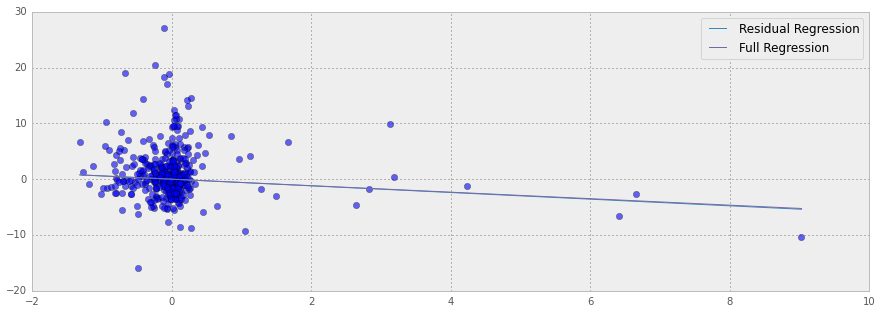

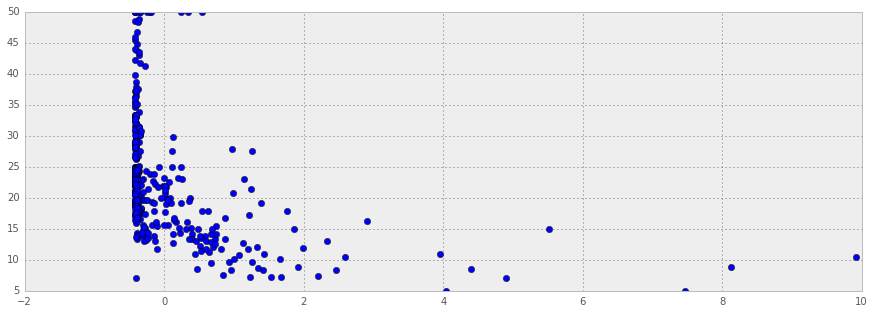

In [16]:
#Compare Partial Regression Plot from y vs x plot
plt.plot(x_res, y_res, 'bo', alpha=0.6)

x_ = np.linspace(np.min(x_res), np.max(x_res), 100)
y_ = single_theta * x_
y1_ = theta['CRIM'] * x_
plt.plot(x_, y_, label='Residual Regression')
plt.plot(x_, y1_, label='Full Regression')
plt.legend()

plt.figure()
plt.plot(train_X['CRIM'], train_y, 'bo')

#It seems like Residual Reg is more meaningful

In [17]:
#Parse label descriptions
labels = """
    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's
    """
labels = [i.strip() for i in labels.split('\n')]

import re
labels = filter(None, [re.match(r'\d+.\s(.*)', i) for i in labels])
labels = [re.split(r'\s{2,}', i.groups()[0]) for i in labels]
labels = {arr[0]:arr[1] for arr in labels}
labels['bias'] = 'bias unit introduced for regression'
labels

{'AGE': 'proportion of owner-occupied units built prior to 1940',
 'B': '1000(Bk - 0.63)^2 where Bk is the proportion of blacks',
 'CHAS': 'Charles River dummy variable (= 1 if tract bounds',
 'CRIM': 'per capita crime rate by town',
 'DIS': 'weighted distances to five Boston employment centres',
 'INDUS': 'proportion of non-retail business acres per town',
 'LSTAT': '% lower status of the population',
 'MEDV': "Median value of owner-occupied homes in $1000's",
 'NOX': 'nitric oxides concentration (parts per 10 million)',
 'PTRATIO': 'pupil-teacher ratio by town',
 'RAD': 'index of accessibility to radial highways',
 'RM': 'average number of rooms per dwelling',
 'TAX': 'full-value property-tax rate per $10,000',
 'ZN': 'proportion of residential land zoned for lots over',
 'bias': 'bias unit introduced for regression'}

In [18]:
#Output data for partial regression plots

#sources
#http://www-hsc.usc.edu/~eckel/biostat2/notes/notes11.pdf
#http://www.econ.uiuc.edu/~roger/courses/471/lectures/L4.pdf
#https://en.wikipedia.org/wiki/Partial_regression_plot
def partial_regression_data(X, y):
    output_df = pd.DataFrame({'temp': y})
    for name in X.columns:
        x_ = x_residual_analysis(X, name)
        y_ = y_residual_analysis(X, y, name)
        output_df[name+'X'] = x_
        output_df[name+'Y'] = y_
    
    output_df.drop('temp', inplace = True, axis=1)
        
    return output_df

partial_regression_data(train_X, train_y).to_csv('partialRegData.csv')

In [30]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(train_X[header[:-1]], train_y)
print regr.coef_

print regr

[-0.84736791  1.0932475   0.02818652  0.75874057 -1.79020454  2.86097982
  0.0510254  -3.20270386  2.5406477  -2.47953052 -2.00347473  0.68508614
 -3.8140439 ]
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [33]:
pred = regr.predict(test_X[header[:-1]])
skl_df = pd.DataFrame({'predict': pred, 'true': test_y})
skl_df

,predict,true
0,25.175513,21.6
1,30.950810,34.7
3,28.353408,36.2
7,11.113914,16.5
9,18.843552,15.0
14,19.350414,19.9
23,15.730679,15.6
29,11.466412,12.7
39,34.479476,34.9
41,25.194988,25.3


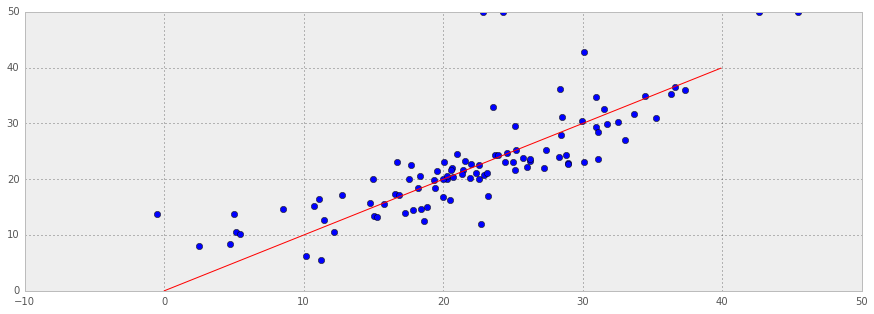

In [34]:
plt.plot(pred, test_y, 'bo')
_x = np.arange(0, 40, .1)
plt.plot(_x, _x, 'r')

In [35]:
print np.mean((regr.predict(test_X[header[:-1]]) - test_y) ** 2)/len(test_y)
print regr.score(test_X[header[:-1]], test_y)

0.324731797307
0.607915470543


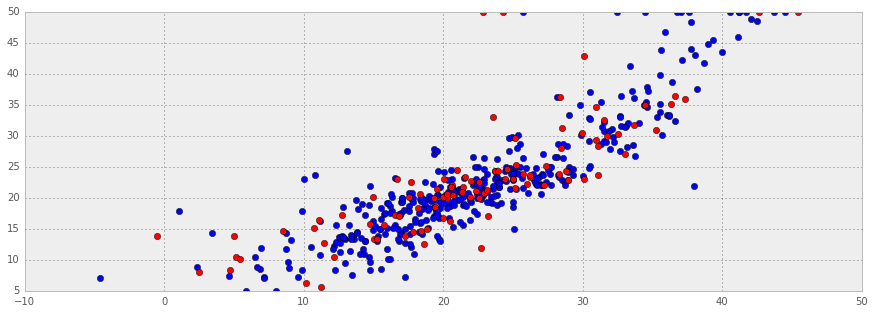

In [37]:
plt.plot(regr.predict(train_X[header[:-1]]), train_y, 'bo')
plt.plot(regr.predict(test_X[header[:-1]]), test_y, 'ro')